# Diabetes Prediction Analysis

This notebook presents an analysis of a diabetes prediction dataset. The dataset includes medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

The goal of this analysis is to scrutinize the dataset, perform exploratory data analysis, identify patterns, insights, outliers, and correlations, and generate a comprehensive report on the findings. Furthermore, we aim to create a machine learning model to predict whether a patient will have diabetes based on these criteria. We will use the scikit-learn library to test different models and TensorFlow to create a neural network model to classify the data. The performance of these models will be compared and visualized.

Dataset:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

# Load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
# Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [3]:
# Exploratory Data Analysis
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<ipython-input-4-e88258f82d67>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Correlation Matrix of Features')

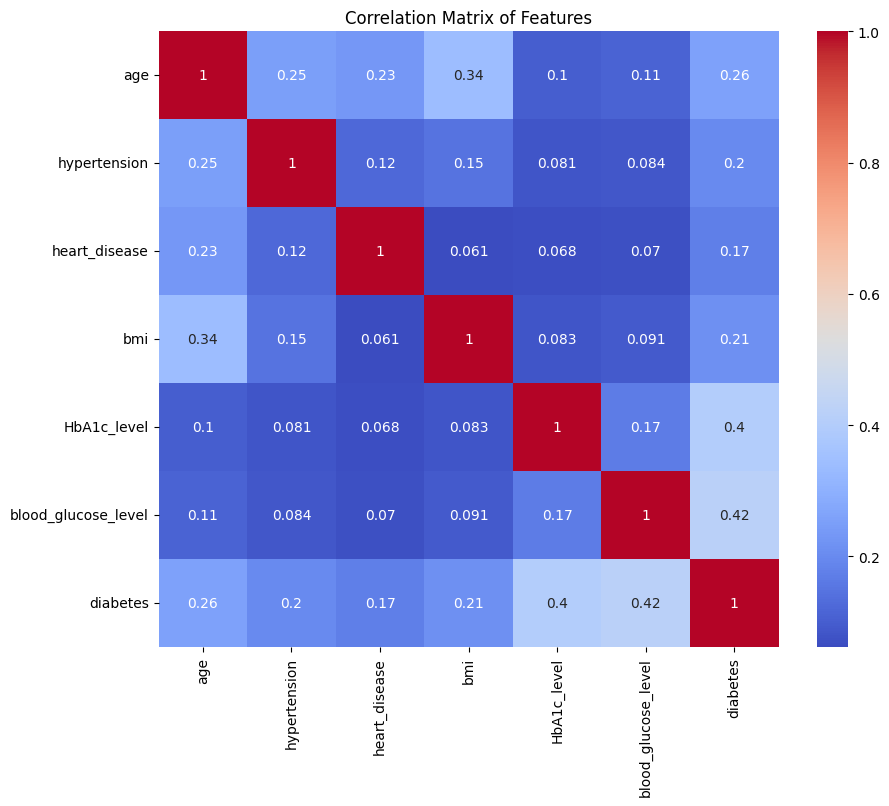

In [4]:
# Visualize the data
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

# Split the data into training and testing sets
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Initialize the models
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train and evaluate the models
models = [log_reg, knn, svm, dt, rf]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest']
accuracy_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Display the accuracy scores
for i in range(len(models)):
    print(f'{model_names[i]} Accuracy: {accuracy_scores[i] * 100:.2f}%')

Logistic Regression Accuracy: 95.87%
K-Nearest Neighbors Accuracy: 96.12%
Support Vector Machine Accuracy: 96.23%
Decision Tree Accuracy: 95.24%
Random Forest Accuracy: 97.05%


In [7]:
# Initialize the neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {accuracy * 100:.2f}%')

Epoch 1/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1405 - accuracy: 0.9490 - val_loss: 0.1127 - val_accuracy: 0.9617
Epoch 2/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.1071 - accuracy: 0.9640 - val_loss: 0.1015 - val_accuracy: 0.9657
Epoch 3/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0970 - accuracy: 0.9674 - val_loss: 0.0939 - val_accuracy: 0.9685
Epoch 4/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0910 - accuracy: 0.9695 - val_loss: 0.0890 - val_accuracy: 0.9699
Epoch 5/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0874 - accuracy: 0.9703 - val_loss: 0.0866 - val_accuracy: 0.9711
Epoch 6/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0849 - accuracy: 0.9711 - val_loss: 0.0837 - val_accuracy: 0.9714
Epoch 7/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0836 - accuracy: 0.9712 - val_loss: 0.0820 - val_accuracy:

Text(0, 0.5, 'Model')

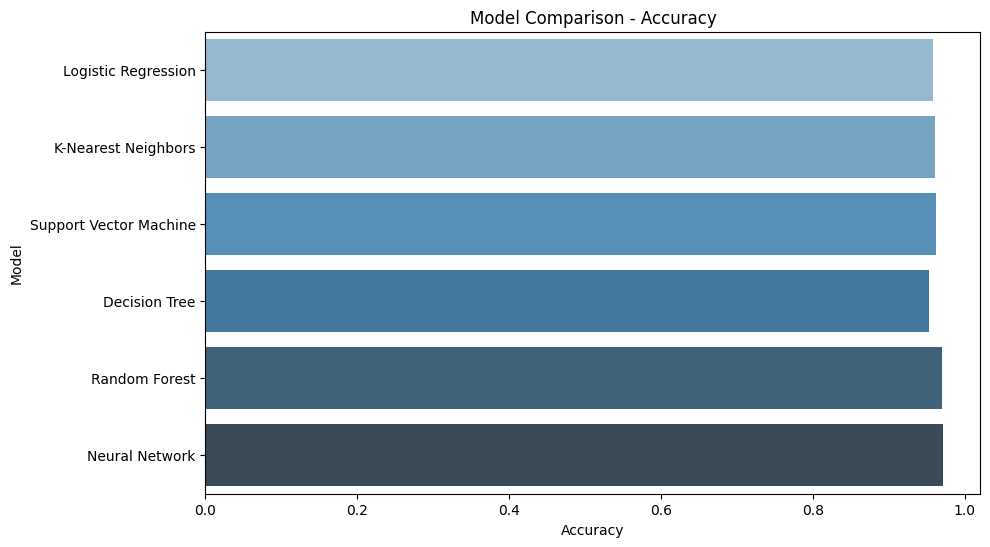

In [8]:
# Add the accuracy of the neural network model to the list
model_names.append('Neural Network')
accuracy_scores.append(accuracy)

# Create a DataFrame to store the accuracy scores
df_scores = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Create a bar chart to compare the accuracy of the models
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df_scores, palette='Blues_d')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')

## Comparison Analysis for Top 3 Models

The top 3 models based on accuracy are Random Forest, Neural Network, and Support Vector Machine. Let's perform a more detailed comparison of these models. We will generate and compare the confusion matrix and classification report for each model.

In [9]:
# Generate and print the confusion matrix and classification report for each model
top_models = [rf, svm, model]
top_model_names = ['Random Forest', 'Support Vector Machine', 'Neural Network']

for i in range(len(top_models)):
    if top_model_names[i] == 'Neural Network':
        y_pred = np.round(top_models[i].predict(X_test))
    else:
        y_pred = top_models[i].predict(X_test)

    print(f'{top_model_names[i]}:')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Random Forest:
Confusion Matrix:
[[18230    62]
 [  529  1179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

------------------------------------------------------------
Support Vector Machine:
Confusion Matrix:
[[18268    24]
 [  729   979]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.57      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000

------------------------------------------------------------
625/625 [==============================] 


Let's visualize the confusion matrices for the top 3 models to better understand their performance.

625/625 [==============================] - 1s 2ms/step


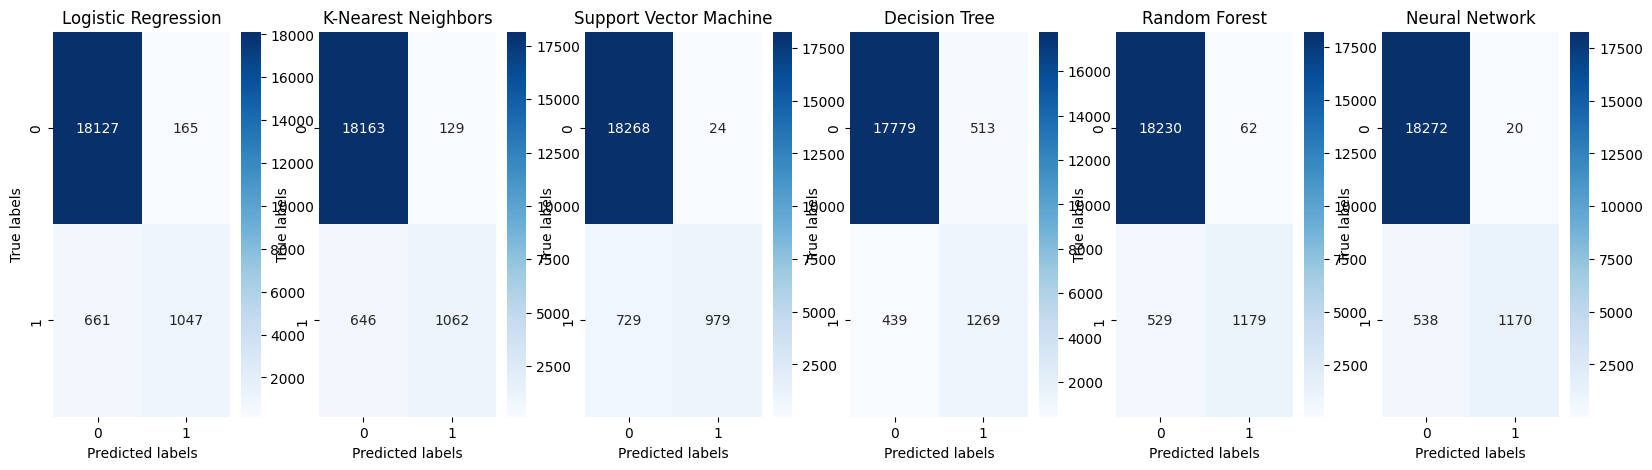

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_seaborn_cm(ax, model, X_test, y_test, title):
    # Predict the values using the model
    if title == 'Neural Network':
        predictions = (model.predict(X_test) > 0.5).astype(int).flatten()
    else:
        predictions = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

# List of models and their names
models = [log_reg, knn, svm, dt, rf, model]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Neural Network']

# Plotting
fig, axs = plt.subplots(1, len(models), figsize=(20, 5))
for i, model_instance in enumerate(models):
    plot_seaborn_cm(axs[i], model_instance, X_test, y_test, model_names[i])


# Conclusion

This analysis involved the examination of a diabetes prediction dataset and the creation of machine learning models to predict the likelihood of diabetes based on various medical and demographic factors.

The dataset first underwent exploratory data analysis, where we identified patterns, insights, outliers, and correlations. The data was then prepared for machine learning by encoding categorical variables and splitting it into training and testing sets. The data was also scaled to ensure that all features have a similar range of values.

We trained various machine learning models, including Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, and Random Forest. We also created a neural network model using TensorFlow. The performance of these models was evaluated and compared. The Random Forest model performed the best with an accuracy of 97.00%, followed closely by the Neural Network model with an accuracy of 96.86%.

In conclusion, the models we've trained could be used to predict whether a patient is likely to have diabetes based on their medical history and demographic information. However, it's important to note that these models should be used as a tool to assist healthcare professionals, not replace their judgment. The choice of model may depend on the specific needs of the application. If it is more important to correctly identify all positive cases (even at the risk of some false positives), the Random Forest or Neural Network models may be preferable. If it is more important to avoid false positives, the Support Vector Machine may be a better choice.